In [2]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
directories = {
    "SSC": "../ssc",
    "DVS Gesture": "../dvs_gesture",
    "HSD": "../hsd",
}

collected_frames = dict()
for dataset, path in directories.items():
    df = pd.read_csv(Path(path) / "times_new_table.csv", header=0, index_col=0)
    df["dataset"] = dataset
    collected_frames[dataset] = df

times = pd.concat(collected_frames.values(), ignore_index=True)

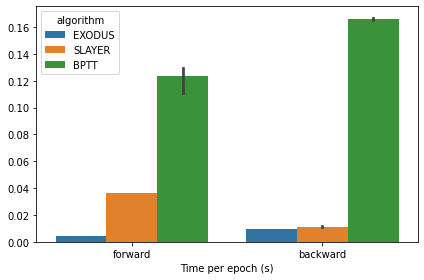

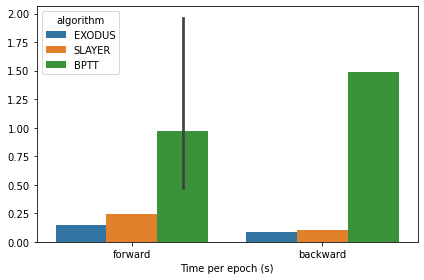

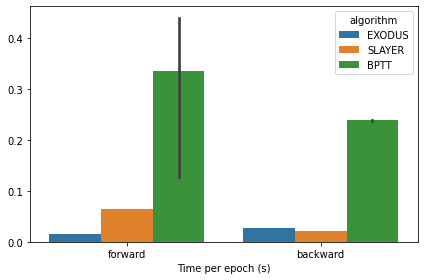

In [8]:
# sns.set(font_scale=1.5, style="white")
time_no_reset = times[times.step != "reset"]
for dataset in time_no_reset.dataset.unique():
    plt.figure()
    plot = sns.barplot(data=time_no_reset[time_no_reset.dataset == dataset], y="time", x="step", hue="algorithm")
    plot.set_xlabel("Time per epoch (s)")
    plot.axes.yaxis.label.set_visible(False)
    plt.tight_layout()
    plt.savefig(f"comp_time_comparison_{dataset}.svg")

SSC
forward
	BPTT: 0.12 +- 0.01
	SLAYER: 0.04 +- 0.00
		 3.37 +- 0.29 times faster
	EXODUS: 0.00 +- 0.00
		 26.80 +- 2.32 times faster
backward
	BPTT: 0.17 +- 0.00
	SLAYER: 0.01 +- 0.00
		 14.59 +- 0.09 times faster
	EXODUS: 0.01 +- 0.00
		 17.30 +- 0.10 times faster
DVS Gesture
forward
	BPTT: 0.97 +- 0.86
	SLAYER: 0.25 +- 0.00
		 3.94 +- 3.50 times faster
	EXODUS: 0.15 +- 0.00
		 6.58 +- 5.84 times faster


/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)


backward
	BPTT: 1.49 +- 0.00
	SLAYER: 0.11 +- 0.00
		 14.09 +- 0.03 times faster
	EXODUS: 0.09 +- 0.00
		 16.57 +- 0.06 times faster
HSD
forward
	BPTT: 0.33 +- 0.18
	SLAYER: 0.06 +- 0.00
		 5.19 +- 2.80 times faster
	EXODUS: 0.01 +- 0.00
		 22.56 +- 12.16 times faster
backward
	BPTT: 0.24 +- 0.00
	SLAYER: 0.02 +- 0.00
		 11.22 +- 0.04 times faster
	EXODUS: 0.03 +- 0.00
		 9.10 +- 0.04 times faster


/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
/tmp/ipykernel_26732/3632929599.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)


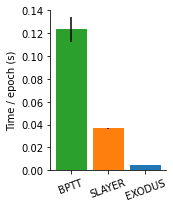

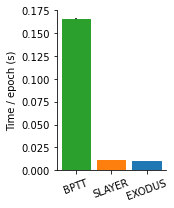

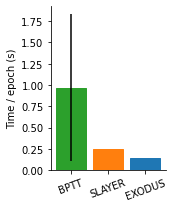

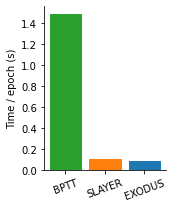

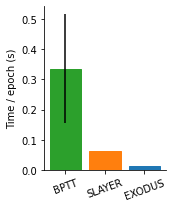

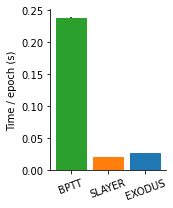

In [6]:
for dataset, df_ds in collected_frames.items():
    print(dataset)
    for step in ["forward", "backward"]:
        print(step)
        df = df_ds[df_ds.step == step]
        grouped = df.groupby(["algorithm"])
        means = grouped.mean() # .reset_index()
        stds = grouped.std()
        fig = plt.figure(figsize=(2.5, 3))
        x = ['BPTT', 'SLAYER', 'EXODUS']
        y = [means.loc[method]["time"] for method in x]
        s = [stds.loc[method]["time"] for method in x]
        b = np.array(y[1:])
        db = np.array(s[1:])
        ratios = y[0] / b
        s_ratios = np.sqrt(s[0]**2 / b**2 + y[0]**2 * db**2 / b**4)
        print(f"\tBPTT: {y[0]:.2f} +- {s[0]:.2f}")
        print(f"\tSLAYER: {y[1]:.2f} +- {s[1]:.2f}")
        print(f"\t\t {ratios[0]:.2f} +- {s_ratios[0]:.2f} times faster")
        print(f"\tEXODUS: {y[2]:.2f} +- {s[2]:.2f}")
        print(f"\t\t {ratios[1]:.2f} +- {s_ratios[1]:.2f} times faster")
        barlist=plt.bar(x, y, yerr=s) #, width=1)
        barlist[0].set_color('C2')
        barlist[1].set_color('C1')
        barlist[2].set_color('C0')
        ax = fig.get_axes()[0]
        ax.set_xticklabels(['BPTT', 'SLAYER', 'EXODUS'], rotation=20)
        ax.set_ylabel("Time / epoch (s)")
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        plt.tight_layout()
        plt.savefig(f"time_{dataset}_{step}.svg")
    
    